<a href="https://colab.research.google.com/github/abdullahaqr/Sparks_Foundation_Task-1_Supervised_Linear_Regression/blob/main/Sparks_Foundation_Task_1_Supervised_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION**

DOMAIN: DATA SCIENCE AND BUSINESS ANALYTICS INTERN JUNE-21

**NAME: ABDULLAH BIN ABDUL QADEER**

TASK-1 PREDICTION USING SUPERVISED MACHINE LEARNING


*   The given data has only two columns hours and score, so predicting the score of the student depend on number of hours studied using simple linear regression.
*   What will be predicted score if a student studies for 9.25 hrs/ day?



### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### **Importing Data**

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Data Visualisation**

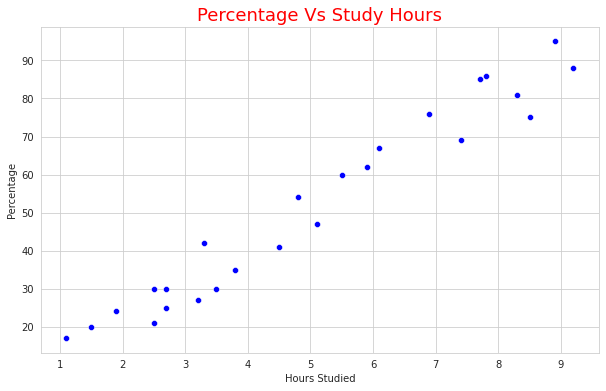

In [7]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'],color = 'blue')
plt.title('Percentage Vs Study Hours',size=18,color ='red')
plt.ylabel('Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()


### **Data Training**

In [8]:
#dividing the dataset into inputs(attributes) and output(labels)

x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [9]:
#dividing the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#Using LinearRegression() for training the model

from sklearn.linear_model import LinearRegression  

#calling the linear regression classifier

linear_reg = LinearRegression()  
linear_reg.fit(x_train, y_train) 

print("Training is Completed! and Model is ready for Use!")

Training is Completed! and Model is ready for Use!


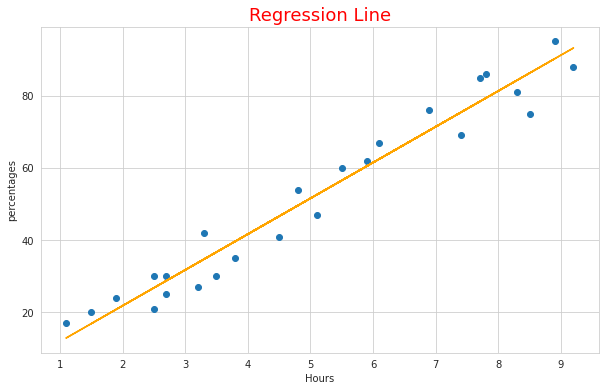

In [11]:
# Plotting the regression line
m = linear_reg.coef_
b = linear_reg.intercept_
line = m*x+b

# Plotting for the test data
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(x, line, color ='orange');
plt.xlabel('Hours'),plt.ylabel('percentages')
plt.title("Regression Line", size=18, color ='red')
plt.show()


### **Testing**

In [12]:
pred_y = linear_reg.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Percentage': [k for k in pred_y]})
prediction

,Hours,Percentage
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


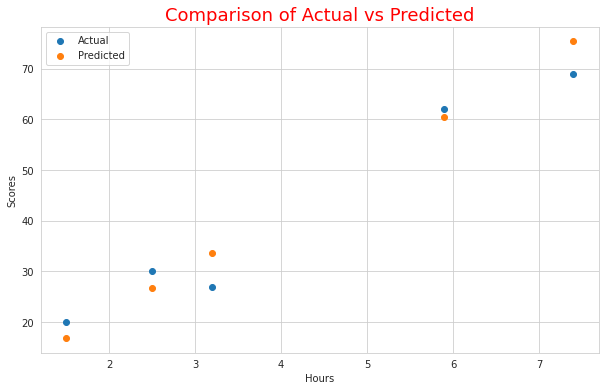

In [14]:
#Visualizing Comparison
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test)
plt.scatter(x_test, pred_y)
plt.xlabel('Hours'), plt.ylabel('Scores')
plt.legend(["Actual","Predicted"])
plt.title("Comparison of Actual vs Predicted", size=18, color ='red')
plt.show()


### **Find out: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [15]:
study_hours = [9.25]
answer = linear_reg.predict([study_hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


In [16]:
#conclusion and evaluation of model
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y)) 
print('Max Error:', metrics.max_error(y_test, pred_y)) 
print('Median absolute Error:', metrics.median_absolute_error(y_test, pred_y))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Max Error: 6.732260779489835
Median absolute Error: 3.2051987569597387
